### Neural Networks in keras

<p>
    Keras is built upon tensorflow API's. Keras provides easy to use API's which abtracts major part of model building in tensorflow, thus provide fast prototyping.
<p>
    Unlike in tensorflow, where you have to provide input dimension as well as output dimensions and perform dot product of weight and input data, keras handles all this and provide you nice wrapper around it. So, let's dive in to build our first keras model.

#### Sequential Model


In [38]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Load traffic sign small data set

training_file = "./dataset/traffic/small_traffic_set/small_train_traffic.p"
test_file = "./dataset/traffic/small_traffic_set/small_test_traffic.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(test_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [37]:
num_examples, h, w, c = X_train.shape
n_classes  = len(np.unique(y_train))
print("num of train examples: {}".format(num_examples))
print("input image shape: {}".format((h,w,c)))
print("classes: {}".format(n_classes))

print(y_train)

h, w, c = X_test[0].shape
print("num of test examples: {}".format(len(X_test)))
print("input image shape: {}".format((h,w,c)))

num of train examples: 100
input image shape: (32, 32, 3)
classes: 5
[2 2 3 2 4 3 3 3 1 4 2 4 2 5 1 4 5 1 1 1 4 2 1 4 5 3 4 1 3 4 4 5 5 1 4 5 2
 5 1 5 3 5 2 2 1 3 5 5 4 2 5 4 3 3 2 5 3 2 3 3 1 5 5 2 1 2 2 2 4 1 5 4 4 5
 5 3 1 3 4 3 4 4 5 2 4 1 3 5 4 4 2 5 1 1 2 3 1 3 1 4]
num of test examples: 20
input image shape: (32, 32, 3)


In [45]:
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
print(y_train_cat)

IndexError: index 5 is out of bounds for axis 1 with size 5

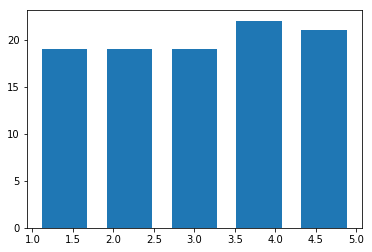

In [20]:
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [46]:
def keras_model():
    # create the Sequential model
    model = Sequential()

    #1st Layer - Add a flatten layer
    model.add(Flatten(input_shape=(32, 32, 3)))

    #2nd Layer - Add a fully connected layer
    model.add(Dense(100))

    #3rd Layer - Add a ReLU activation layer
    model.add(Activation('relu'))

    #4th Layer - Add a fully connected layer
    model.add(Dense(5))

    model.add(Activation('relu'))
    
    model.add(Dense(6, activation='softmax'))
    
    return model

In [47]:
model = keras_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 505       
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 36        
Total params: 307,841
Trainable params: 307,841
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [49]:
batch_size = 128
epochs = 20

In [50]:
history = model.fit(X_train, to_categorical(y_train), 
                    batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split=0.20)

Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 4s 53ms/step - loss: 13.1305 - acc: 0.1375 - val_loss: 11.2866 - val_acc: 0.3000
Epoch 2/20
80/80 [==============================] - 0s 200us/step - loss: 9.2779 - acc: 0.4250 - val_loss: 12.3397 - val_acc: 0.2000
Epoch 3/20
80/80 [==============================] - 0s 200us/step - loss: 10.6758 - acc: 0.3375 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 4/20
80/80 [==============================] - 0s 201us/step - loss: 12.4915 - acc: 0.2250 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 5/20
80/80 [==============================] - 0s 200us/step - loss: 12.4915 - acc: 0.2250 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 6/20
80/80 [==============================] - 0s 158us/step - loss: 12.4915 - acc: 0.2250 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 7/20
80/80 [==============================] - 0s 180us/step - loss: 12.4915 - acc: 0.2250 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 8/20
80/80 [==